# Decision Tree

Decision Tree is one of the most popular machine learning algorithm which belongs to supervised learning type. It's a structure for decision-making where each decision leads to set of consequences or additional decisions. Decision Tree can be used for both classification and regression.

## Case Study: App Recommendation Engine

Say, we are about to build a recommendation for the App Store or Google Play. The task is to recommend people the app they're most likely to download, based on previous data. Below is the data we have.

| Gender | Occupation | App |
|:-----:|---------|-------|
| F | Study | PUBG |
| F | Work | Slack |
| M | Work | Tinder |
| F | Work | Slack |
| M | Study | PUBG |
| M | Study | PUBG |

First, let's consider these questions.

- For a woman who works at an office, what app do we recommend?
- For a man who works at a factory, what app do we recommend?
- For a girl who goes to high school, what app do we recommend?

### Machine asks slightly different question

- Between gender and occupation, which one seems more decisive for predicting what app will the users download?

### How about data with numerical/continuous features?

Consider a case of student admission with features: `Grades` and `Test`. We can ask similar question but different notion.

- Between a horizontal and a vertical line, which one would cut the data better? (After making a plot)

## Entropy

In order computers (model) to know, we introduce **Entropy**. Borrowed from physics, strictly speaking, entropy is a measure of how much freedom particles have to move around. Consider below image of state of particles.

![](../python-for-data-science/assets/img/entropy-particles.png)

Ice will have the lowest entropy, water have medium entropy, and gas will have the highest entropy since it can move around a lot.

### Entropy in Probability

Imagin you have 3 buckets. Each buckets consist of 4 balls with different configuration of color.

- Bucket A - 4 red balls
- Bucket B - 3 red balls, 1 blue balls
- Bucket C - 2 red balls, 2 blue balls

Entropy measure how much balls are allowed to move around if we put them in a line? Which bucket does have the highest entropy, medium, and lowest one?

## Entropy in Knowledge

Using the same scenario and configuration, now consider you take one ball from those buckets. Which bucket does inform you better about the color? Which bucket does have the highest entropy and/or highest knowledge?

## Entropy Formula

$$
entropy = - \sum_{i=1}^{n}{p_i} \cdot \log_2 p_i
$$

## Information Gain

In decision tree, information gain is the change of entropy of parent nodes with the child nodes. This is where decision tree got calculated and measure how well the model is.

## Hyperparameters for Decision Trees

In order to create decision trees that will generalize to new problems well, we can tune a number of different aspects about the trees. We call the different aspects of a decision tree "hyperparameters". These are some of the most important hyperparameters used in decision trees:

### Maximum depth
The maximum depth of a decision tree is simply the largest length between the root to a leaf. A tree of maximum length `k` can have at most $2^k$ leaves.

### Minimum number of samples per leaf
Minimum number of samples required to be at a leaf node. When splitting a node, one could run into the problem of having 99 samples in one of them, and 1 on the other. This will not take us too far in our process, and would be a waste of resources and time. If we want to avoid this, we can set a minimum for the number of samples we allow on each leaf.

### Minimum number of samples per split
This is the same as number of samples per leaf, but applied on any split of an internal node.

### Maximum number of features
Oftentimes, we will have too many features to build a tree. If this is the case, in every split, we have to check the entire dataset on each of the features which is very expensive. A solution for this is to limit the number of features that one looks for in each split.

---

## Decision Trees in Scikit-Learn

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv", header=None)
# display(df.head)
# display(df.describe)
# display(df.info)

In [3]:
X = df[[0, 1]].values
y = df[2].values

In [4]:
clf = DecisionTreeClassifier(random_state=111).fit(X, y)

In [5]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=111, splitter='best')

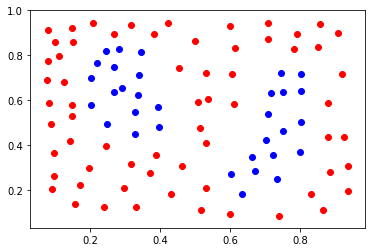

In [6]:
plt.scatter(df[df[2] == 0][0], df[df[2] == 0][1], c='b')
plt.scatter(df[df[2] == 1][0], df[df[2] == 1][1], c='r')

In [7]:
y_pred = clf.predict(X)

In [8]:
from sklearn import metrics
from sklearn import tree

In [9]:
print ("Accuracy", metrics.accuracy_score(y, y_pred))
print ("MSE", metrics.mean_squared_error(y, y_pred))
print ("RMSE", np.sqrt(metrics.mean_squared_error(y, y_pred)))

Accuracy 1.0
MSE 0.0
RMSE 0.0


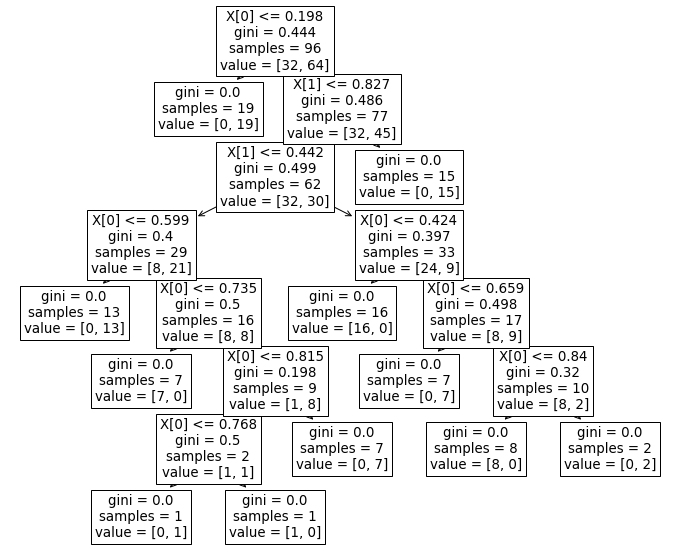

In [10]:
fig, ax = plt.subplots(figsize=(12,10))
tree.plot_tree(clf, ax=ax)
plt.show()
plt.close()

![](DTclf.png)

In [11]:
import sklearn
sklearn.__version__

'0.21.3'

In [12]:
graph_tree = tree.export_graphviz(clf, out_file='DTclf.dot', feature_names=['x1', 'x2'],
                                 class_names=str(df[2]), filled=True, rounded=True,
                                 special_characters=True)

In [13]:
print ("Criterion: Entropy")
clf_S = DecisionTreeClassifier(criterion='entropy', random_state=111).fit(X, y)
y_pred = clf_S.predict(X)
print ("Accuracy", metrics.accuracy_score(y, y_pred))
print ("MSE", metrics.mean_squared_error(y, y_pred))
print ("RMSE", np.sqrt(metrics.mean_squared_error(y, y_pred)))

Criterion: Entropy
Accuracy 1.0
MSE 0.0
RMSE 0.0


In [14]:
clf_S

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=111, splitter='best')

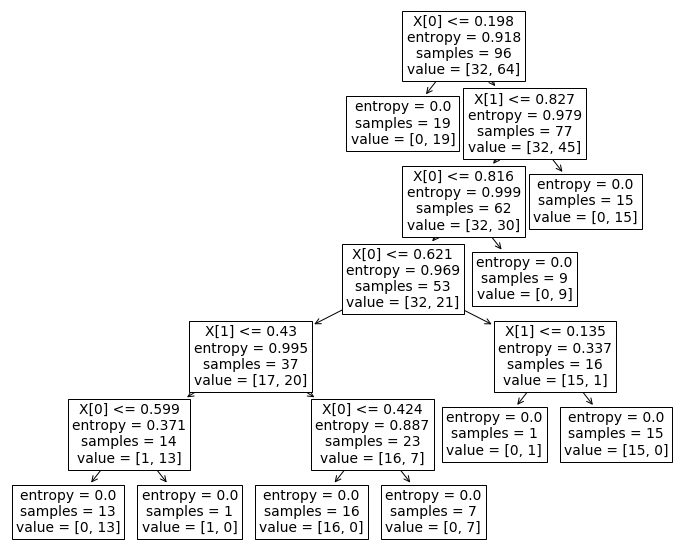

In [15]:
fig, ax = plt.subplots(figsize=(12,10))
tree.plot_tree(clf_S, ax=ax)
plt.show()
plt.close()

In [16]:
graph_tree = tree.export_graphviz(clf_S, out_file='DT_entropy.dot', feature_names=['x1', 'x2'],
                                 class_names=str(df[2]), filled=True, rounded=True,
                                 special_characters=True)

!['AAAA'](DT_entropy.png)

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [18]:
iris = load_iris()

In [40]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [41]:
X = iris.data
y = iris.target

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

In [68]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=111,
                            min_samples_leaf=5, min_samples_split=10)
clf = clf.fit(X_train, y_train)

In [69]:
y_pred = clf.predict(X_test)

In [70]:
print ("Test")
print ("Accuracy", metrics.accuracy_score(y_test, y_pred))
print ("MSE", metrics.mean_squared_error(y_test, y_pred))
print ("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy 0.868421052631579
MSE 0.13157894736842105
RMSE 0.3627381250550058


In [71]:
metrics.confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0,  8,  3],
       [ 0,  2, 13]])

In [74]:
y_pred = clf.predict(X_train)
print ("Train")
print ("Accuracy", metrics.accuracy_score(y_train, y_pred))
print ("MSE", metrics.mean_squared_error(y_train, y_pred))
print ("RMSE", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Train
Accuracy 0.9732142857142857
MSE 0.026785714285714284
RMSE 0.16366341767699427


In [80]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=111,
                            min_samples_leaf=1, min_samples_split=2)
clf = clf.fit(X_train, y_train)
print ("Accuracy", metrics.accuracy_score(y_train, clf.predict(X_train)))
print ("Accuracy", metrics.accuracy_score(y_test, clf.predict(X_test)))

Accuracy 1.0
Accuracy 0.8421052631578947


In [81]:
for z, feat in enumerate(iris.feature_names):
    print (f"{feat}, importance {clf.feature_importances_[z]}")

sepal length (cm), importance 0.058578273140235386
sepal width (cm), importance 0.0
petal length (cm), importance 0.6254933503871124
petal width (cm), importance 0.3159283764726522


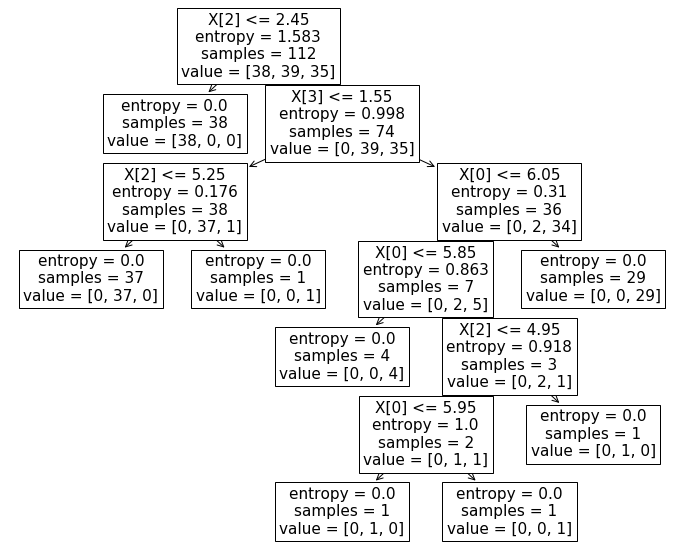

In [85]:
fig, ax = plt.subplots(figsize=(12,10))
tree.plot_tree(clf, ax=ax)
plt.show()
plt.close()

graph_tree = tree.export_graphviz(clf, out_file='DT_overfitting.dot', feature_names=iris.feature_names,
                                 class_names=iris.target_names, filled=True, rounded=True,
                                 special_characters=True)

![](DT_overfitting.png)